# Análise de Retenção de Usuários

## Análise Exploratória de Dados

Nesse notebook começaremos a trabalhar nas bases de dados geradas no último notebook.

Os objetivos aqui são:

* Fazer uma análise descritiva dos dados
* Fazer uma análise cohort dos usuários
* Fazer análises de correlação das transações e do uso com os usuários para identificar padrões

In [21]:
# Importar bibliotecas

import pandas as pd
import matplotlib.pyplot as plt

In [22]:
# Bases de dados que serão utilizadas

users = pd.read_csv('/dev/processed_data/users_processed.csv')
usage = pd.read_csv('/dev/processed_data/usage_processed.csv')
transactions = pd.read_csv('/dev/processed_data/transactions_processed.csv')

# Estatística descritiva

A estatística descritiva é um ramo da estatística que aplica várias técnicas para descrever e resumir um conjunto de dados

Vamos fazer isso para cada uma das tabelas para entender um pouco mais sobre os dados existentes

In [23]:
users.head()

,user_id,signup_date,last_active_date,subscription_type
0,1,2024-03-29,2024-09-02,free
1,2,2020-06-15,2024-09-02,free
2,3,2022-05-06,2024-09-02,premium
3,4,2020-10-23,2024-09-01,premium
4,5,2023-12-23,2024-09-01,free


In [24]:
users['signup_date'] = pd.to_datetime(users['signup_date'])
users['last_active_date'] = pd.to_datetime(users['last_active_date'])

In [25]:
users.describe()

,user_id,signup_date,last_active_date
count,1000.000000,1000,1000
mean,500.500000,2022-05-06 14:55:40.799999744,2024-09-01 23:48:28.800000
min,1.000000,2020-01-03 00:00:00,2024-09-01 00:00:00
25%,250.750000,2021-03-15 18:00:00,2024-09-01 00:00:00
50%,500.500000,2022-05-25 00:00:00,2024-09-02 00:00:00
75%,750.250000,2023-06-18 12:00:00,2024-09-03 00:00:00
max,1000.000000,2024-09-03 00:00:00,2024-09-03 00:00:00
std,288.819436,NaN,NaN


In [46]:
transactions.head()

,user_id,transaction_date,amount
0,114,2024-05-04,74.42
1,855,2024-06-24,14.90
2,595,2024-01-05,25.10
3,216,2024-02-23,39.45
4,232,2024-04-01,90.95


In [27]:
transactions.describe()

,user_id,amount
count,1958.000000,1958.000000
mean,498.202758,51.224581
std,286.484275,28.096776
min,1.000000,1.060000
25%,263.000000,27.395000
50%,503.000000,51.050000
75%,743.750000,75.807500
max,1000.000000,99.940000


In [28]:
usage.head()

,user_id,activity_date,activity_type
0,342,2024-05-18,review
1,317,2024-02-05,login
2,66,2024-03-15,login
3,697,2024-06-16,review
4,615,2024-01-11,login


In [29]:
usage.describe()

,user_id
count,2917.000000
mean,513.383956
std,290.688515
min,1.000000
25%,262.000000
50%,517.000000
75%,767.000000
max,1000.000000


Baseado nos dados encontrados nas tabelas acima, verificamos que o único que nos trás informações interessantes com respeito do que já temos ali, é a tabela de transações. Nela, podemos verificar que:

* Valor médio das transações é de `R$51` Ticket Médio dos usuários
* Maioria das transações é entre `R$27` e `R$75`, portanto, os dados aparentemente estão distribuídos normalmente e a média e a mediana devem estar próximas.

Essas e outras coisas serão exploraras mais abaixo.


# Análise da tabela `users`

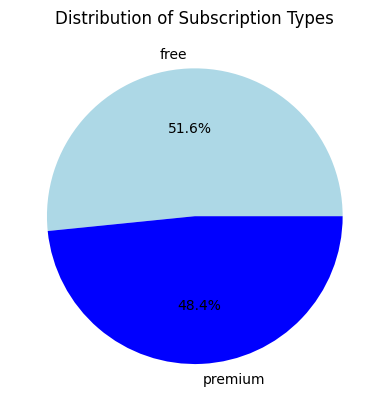

In [30]:
# Distribuição dos usuários por tipo de assinatura

# Contagem de usuários por tipo de assinatura
subscription_counts = users['subscription_type'].value_counts()

# Criando um gráfico de pizza
plt.pie(subscription_counts.values, labels=subscription_counts.index, autopct='%1.1f%%', colors=['lightblue', 'blue'])
plt.title("Distribution of Subscription Types")
plt.show()

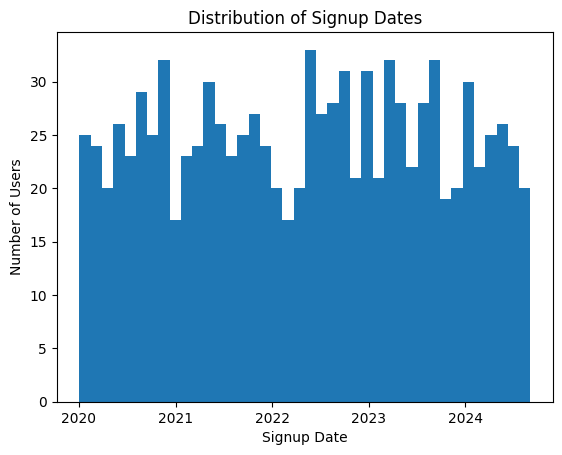

In [31]:
# Histograma sobre as datas de inscrição

plt.hist(users['signup_date'], bins=40)
plt.xlabel('Signup Date')
plt.ylabel('Number of Users')
plt.title('Distribution of Signup Dates')
plt.show()

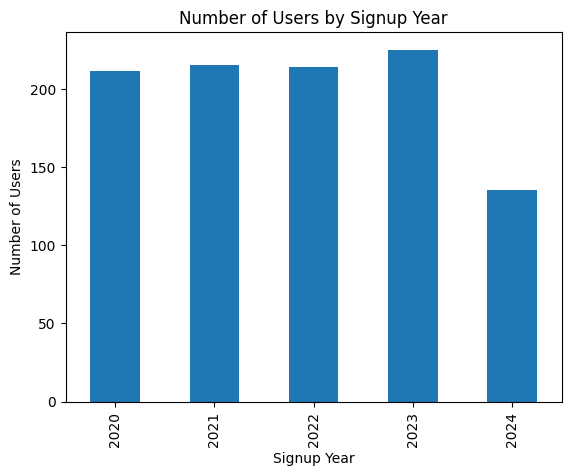

In [32]:
users.groupby(users['signup_date'].dt.year).size().plot(kind='bar')
plt.xlabel('Signup Year')
plt.ylabel('Number of Users')
plt.title('Number of Users by Signup Year')
plt.show()

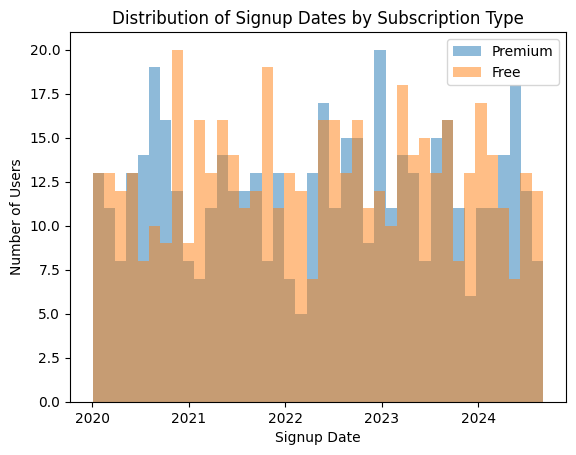

In [33]:
# Criar um gráfico de histograma para usuários premium
premium_users = users[users['subscription_type'] == 'premium']
plt.hist(premium_users['signup_date'], bins=40, alpha=0.5, label='Premium')

# Criar um gráfico de histograma para usuários free
free_users = users[users['subscription_type'] == 'free']
plt.hist(free_users['signup_date'], bins=40, alpha=0.5, label='Free')

plt.xlabel('Signup Date')
plt.ylabel('Number of Users')
plt.title('Distribution of Signup Dates by Subscription Type')
plt.legend()
plt.show()

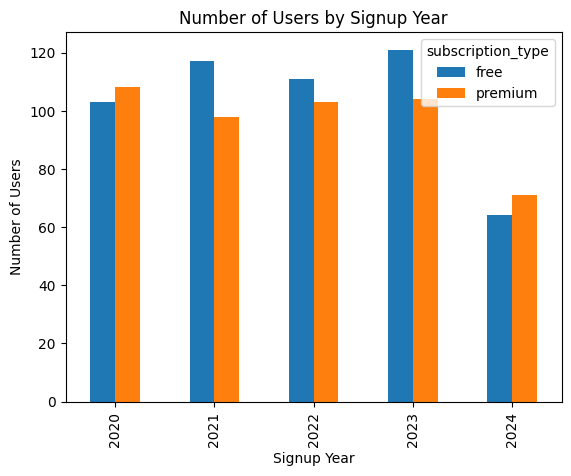

In [34]:
users.groupby([users['signup_date'].dt.year, 'subscription_type']).size().unstack().plot(kind='bar')
plt.xlabel('Signup Year')
plt.ylabel('Number of Users')
plt.title('Number of Users by Signup Year')
plt.show()

Com base na verificação dos dados acima, é possível verificar que existe uma semelhança na quantidade de usuários que entraram anualmente desde o início das operações, além disso, não há uma diferença significativa na quantidade de usuários que assinaturas `free` ou `premium`

# Análise da tabela `transactions`

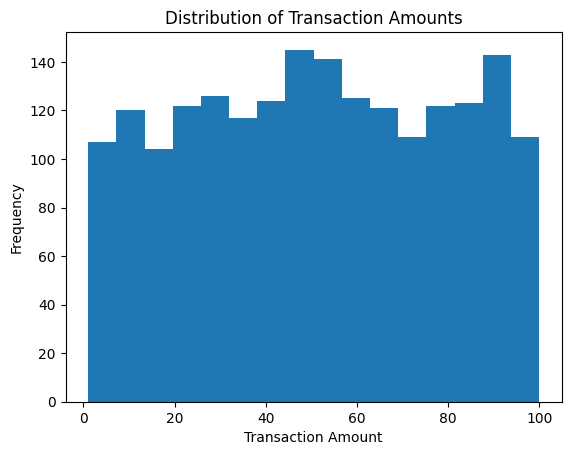

In [35]:
# Histograma
plt.hist(transactions['amount'], bins=16)
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Amounts')
plt.show()

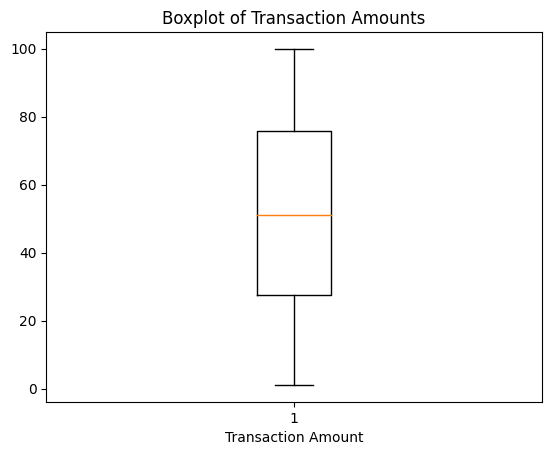

In [36]:
# Boxplot
plt.boxplot(transactions['amount'])
plt.xlabel('Transaction Amount')
plt.title('Boxplot of Transaction Amounts')
plt.show()

In [40]:
transactions['transaction_date'] = pd.to_datetime(transactions['transaction_date'])

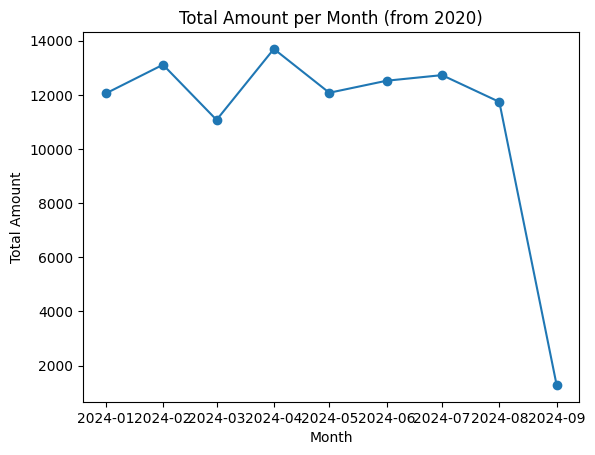

In [45]:
# Filtrar transações a partir de 2020
transactions_from_2020 = transactions[transactions['transaction_date'].dt.year >= 2020]

# Agrupar as transações por mês e calcular a soma dos valores
monthly_transactions = transactions_from_2020.groupby(transactions_from_2020['transaction_date'].dt.to_period('M'))['amount'].sum()

# Criar o gráfico de linhas com marcadores
plt.plot(monthly_transactions.index.to_timestamp(), monthly_transactions.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.title('Total Amount per Month (from 2020)')
plt.show()